In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.model_selection import train_test_split


In [2]:
import scipy.io as sio
temp = sio.loadmat('data/shuttle.mat')
data_X = pd.DataFrame(temp['X'])
data_y = temp['y'][:,0]

In [3]:
df=data_X.copy()
for col in df.columns:
    temp=data_X[col]#.dropna()
    a=temp.quantile(0.99)-temp.quantile(0.01)
    if a<0.001: a=temp.max()-temp.min()
    df[col] = (df[col]-temp.quantile(0.01))/(temp.quantile(0.99)-temp.quantile(0.01))
np.round(df.describe([0.01,0.99, 0.5, 0.25, 0.75]),3)

,0,1,2,3,4,5,6,7,8
count,49097.000,49097.000,49097.000,49097.000,49097.000,49097.000,49097.000,49097.000,49097.000
mean,0.148,0.494,0.298,0.481,0.699,0.527,0.547,0.240,0.086
std,0.192,8.467,0.261,2.505,0.181,3.579,0.198,0.204,0.198
min,-0.149,-481.600,-1.588,-262.133,-1.345,-437.852,-0.721,-3.733,-2.967
1%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.500,0.118,0.467,0.636,0.426,0.471,0.109,0.000
50%,0.104,0.500,0.235,0.467,0.745,0.492,0.559,0.168,0.017
75%,0.194,0.500,0.382,0.467,0.782,0.574,0.618,0.307,0.050
99%,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
max,1.328,508.000,2.176,255.800,4.327,249.082,1.529,2.436,2.217


In [4]:
df=data_X.copy()
for col in df.columns:
    if col in ['country']: continue
    temp=data_X[col]#.dropna()
    a=temp.std()
    if a==0: a=1
    df[col] = (df[col]-temp.mean())/a
np.round(df.describe([0.01,0.99, 0.5, 0.25, 0.75]),3)

,0,1,2,3,4,5,6,7,8
count,49097.000,49097.000,49097.000,49097.000,49097.000,49097.000,49097.000,49097.000,49097.000
mean,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.548,-56.935,-7.223,-104.824,-11.264,-122.483,-6.411,-19.506,-15.421
1%,-0.771,-0.058,-1.140,-0.192,-3.851,-0.147,-2.767,-1.181,-0.432
25%,-0.771,0.001,-0.690,-0.006,-0.344,-0.028,-0.387,-0.646,-0.432
50%,-0.228,0.001,-0.239,-0.006,0.257,-0.010,0.059,-0.354,-0.348
75%,0.238,0.001,0.324,-0.006,0.457,0.013,0.357,0.326,-0.179
99%,4.432,0.060,2.690,0.207,1.659,0.132,2.291,3.729,4.620
max,6.141,59.936,7.195,101.912,19.993,69.446,4.968,10.777,10.767


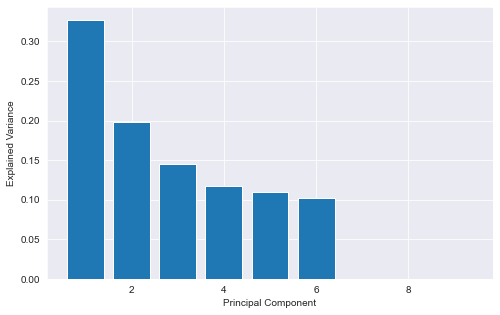

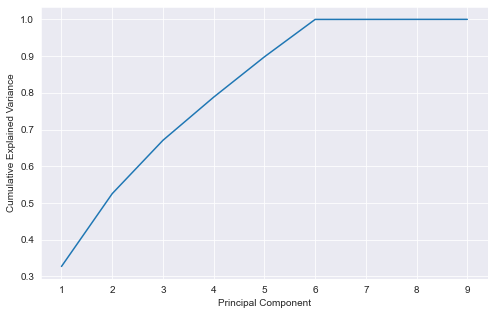

array([3.2705e+01, 1.9825e+01, 1.4528e+01, 1.1751e+01, 1.0977e+01,
       1.0191e+01, 7.0000e-03, 7.0000e-03, 4.0000e-03])

In [5]:
# pca on df
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
pca_df = pd.DataFrame(pca.transform(df),
    columns=['pca%s'%i for i in range(9)])

#pca importance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

# plot cumilative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.show()

pca.explained_variance_ratio_*100000//1/1000

C:\Users\No1\AppData\Local\Temp\ipykernel_4796\801894716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['y']=data_y


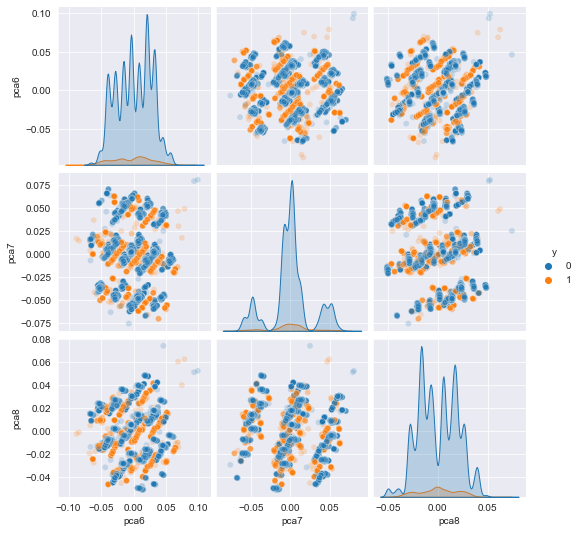

In [31]:
# pairplot drop country with alpha
temp=pca_df[pca_df.columns[6:]]
temp['y']=data_y
sns.pairplot(temp,
             plot_kws={'alpha': 0.2}, hue='y')
plt.show()

C:\Users\No1\AppData\Local\Temp\ipykernel_4796\1369097827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['y']=data_y


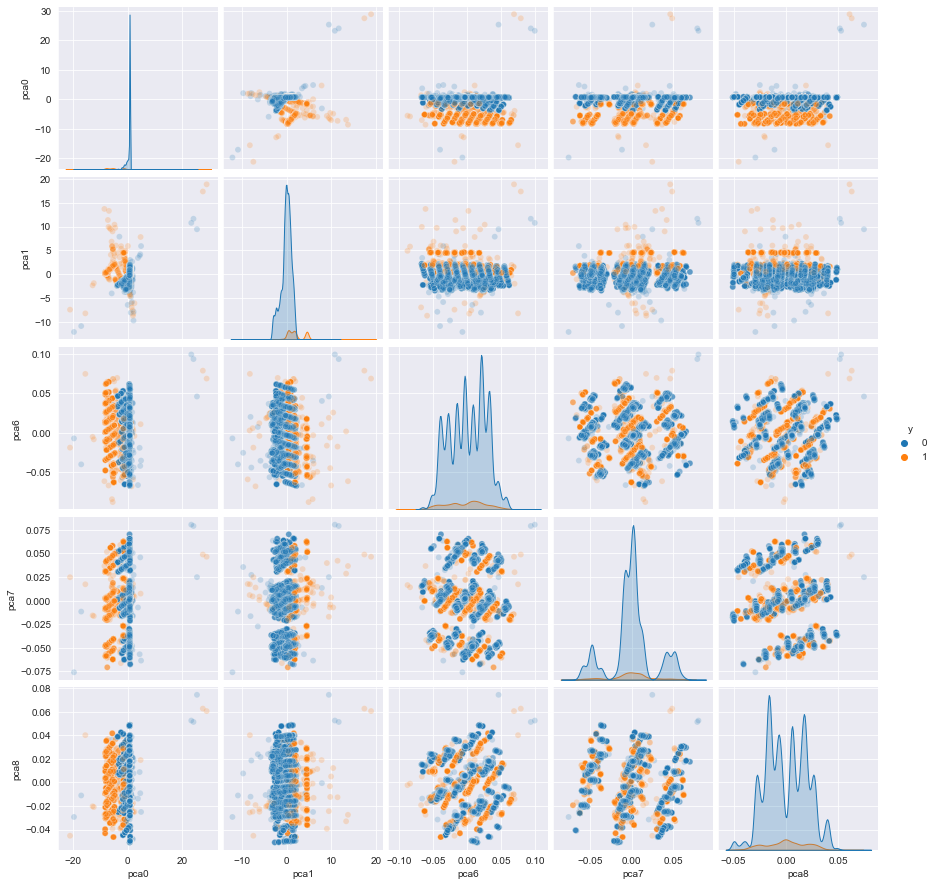

In [32]:
# pairplot drop country with alpha
temp=pca_df[
    list(pca_df.columns[:2])+list(pca_df.columns[6:])
]
temp['y']=data_y
sns.pairplot(temp,
             plot_kws={'alpha': 0.2}, hue='y')
plt.show()

In [6]:
df=pca_df[list(pca_df.columns[:4])]

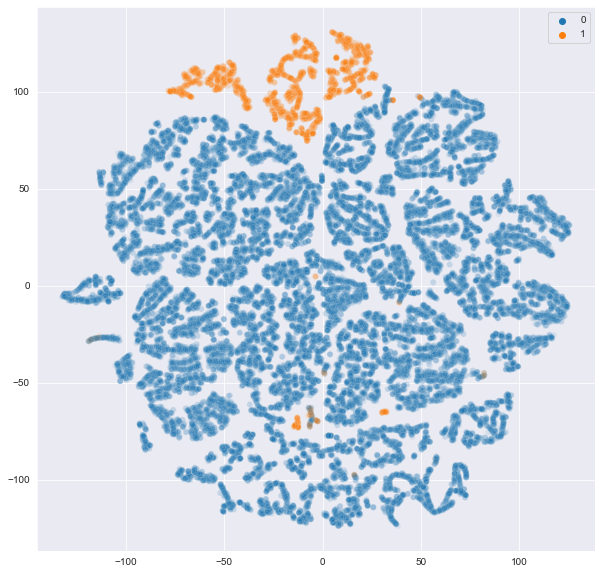

In [7]:
# create tsne plot
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_obj = tsne.fit_transform(data_X)
# plot tsne
plt.figure(figsize=(10,10))
sns.scatterplot(x=tsne_obj[:,0], y=tsne_obj[:,1],
                hue=data_y, alpha=0.1)
plt.show()


In [8]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def cluster_outlier(model):
    temp=df.copy()
    temp['pred']=model.predict(df)

    plt.figure(figsize=(10,10))
    sns.scatterplot(
        x=tsne_obj[:,0], y=tsne_obj[:,1],
        hue=temp['pred'], alpha=0.1,
        palette=sns.color_palette("Set2"))
    plt.show()

    sns.heatmap(
        confusion_matrix(data_y, model.predict(df)),
        annot=True, fmt='d')
    plt.show()
    print('f1',
          f1_score(data_y, model.predict(df)))
    print('accu',
          accuracy_score(data_y, model.predict(df)))

    # plt.figure(figsize=(10,10))
    # sns.pairplot(temp, plot_kws={'alpha': 0.1}, hue='pred',
    #              palette=sns.color_palette("Set2"))
    # plt.show()

C:\Users\No1\AppData\Local\Temp\ipykernel_24532\2853282240.py:9: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(


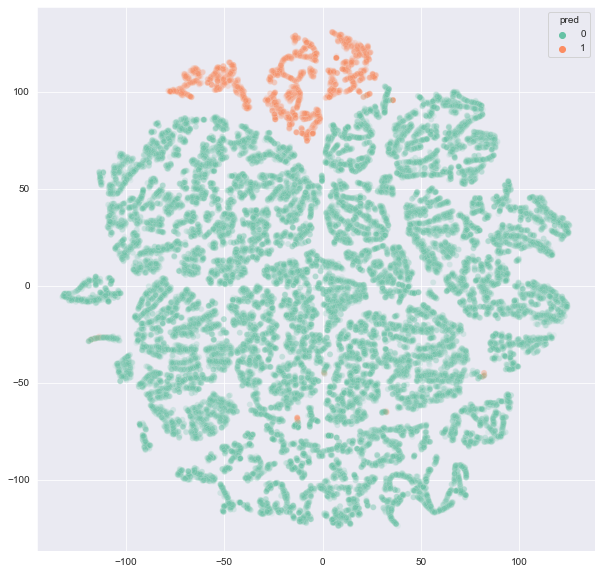

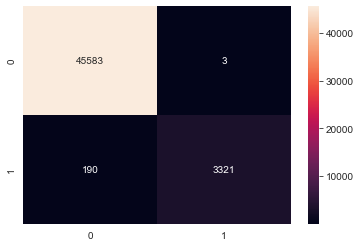

f1 0.9717629846378931
accu 0.9960690062529278


In [9]:
# tsne cluster plot with k=3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=150)
kmeans.fit(df)
cluster_outlier(kmeans)

C:\Users\No1\AppData\Local\Temp\ipykernel_4796\2853282240.py:9: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(


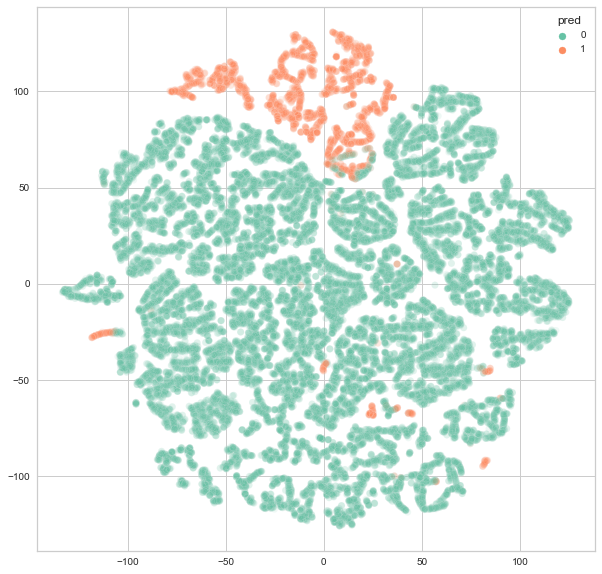

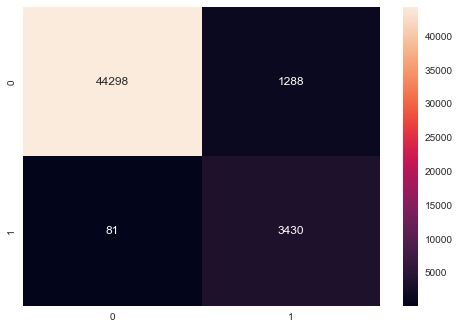

f1 0.8336371369546725
accu 0.9721164225920117


In [37]:
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.base import ClusterMixin

class GMClusters(GaussianMixture, ClusterMixin):
    def __init__(self, n_clusters=1, **kwargs):
        kwargs["n_components"] = n_clusters
        self.n_clusters=n_clusters
        super(GMClusters, self).__init__(**kwargs)

    def fit(self, X, y=None):
        super().fit(X)
        self.labels_ = self.predict(X)
        return self

    def get_params(self, **kwargs):
        output = super().get_params(**kwargs)
        output["n_clusters"] = output.get("n_components", None)
        return output

    def set_params(self, **kwargs):
        kwargs["n_components"] = kwargs.pop("n_clusters", None)
        return super().set_params(**kwargs)

gmc = GMClusters(n_clusters=2, n_init=150)
gmc.fit(df)
cluster_outlier(gmc)

E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


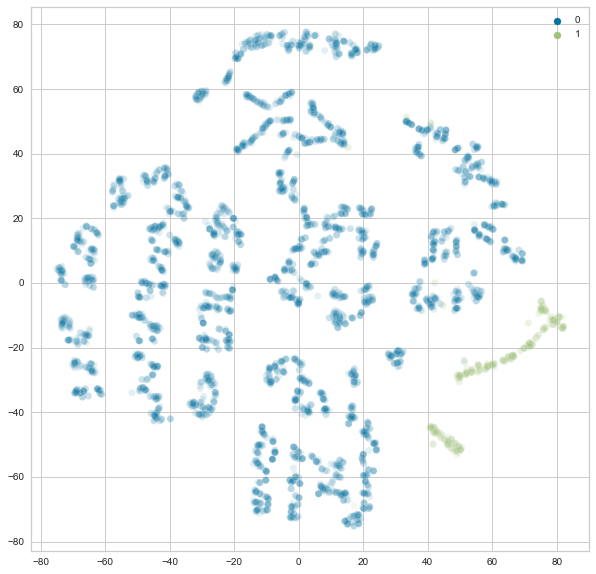

C:\Users\No1\AppData\Local\Temp\ipykernel_4796\3010556145.py:27: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(


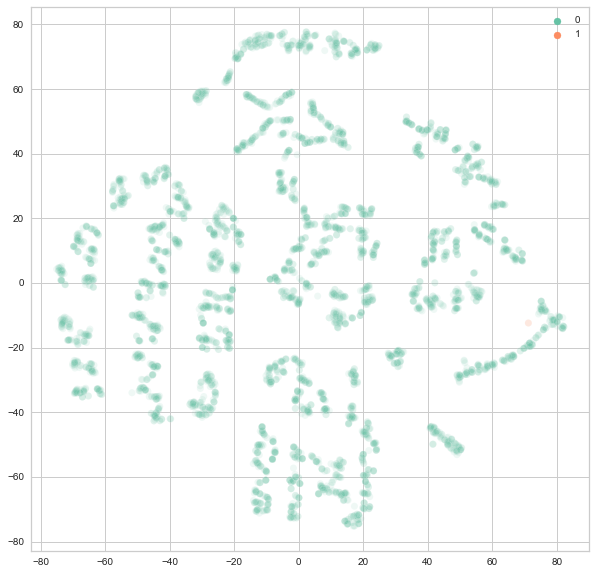

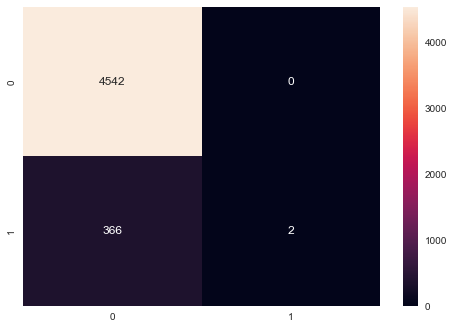

AttributeError: 'SpectralClustering' object has no attribute 'predict'

In [45]:
from sklearn.cluster import SpectralClustering

spc = SpectralClustering(n_clusters=2)
temp=df.astype(np.float16).sample(frac=0.1)
temp2=data_y[temp.index]
temp=temp.values

pred=spc.fit_predict(temp)



# create tsne plot
from sklearn.manifold import TSNE
tsnetemp = TSNE(n_components=2)
temp3 = tsnetemp.fit_transform(temp)

# plot tsne
plt.figure(figsize=(10,10))
sns.scatterplot(x=temp3[:,0], y=temp3[:,1],
                hue=temp2, alpha=0.1)
plt.show()




plt.figure(figsize=(10,10))
sns.scatterplot(
    x=temp3[:,0], y=temp3[:,1],
    hue=pred, alpha=0.1,
    palette=sns.color_palette("Set2"))
plt.show()

sns.heatmap(
    confusion_matrix(temp2, pred),
    annot=True, fmt='d')
plt.show()
print('f1',
      f1_score(temp2, pred))
print('accu',
      accuracy_score(temp2, pred))

C:\Users\No1\AppData\Local\Temp\ipykernel_5940\687627486.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(


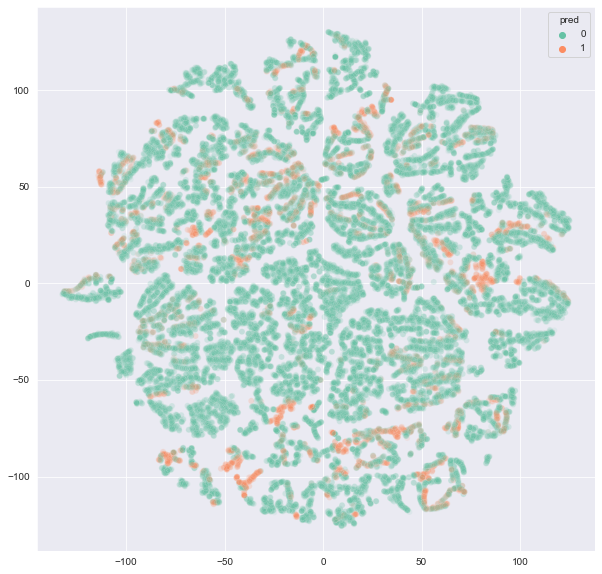

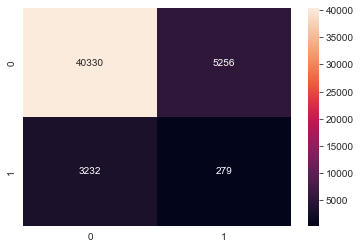

f1 0.061684722529294723
accu 0.8271177465018229


In [15]:
# from sklearn.cluster import SpectralClustering
#
# gmc = SpectralClustering(n_clusters=2, n_init=150, affinity="nearest_neighbors")
# gmc.fit(df)

pred=gmc.labels_
temp=df.copy()
temp['pred']=pred

plt.figure(figsize=(10,10))
sns.scatterplot(
    x=tsne_obj[:,0], y=tsne_obj[:,1],
    hue=temp['pred'], alpha=0.1,
    palette=sns.color_palette("Set2"))
plt.show()

sns.heatmap(
    confusion_matrix(data_y, pred),
    annot=True, fmt='d')
plt.show()
print('f1',
      f1_score(data_y, pred))
print('accu',
      accuracy_score(data_y, pred))